In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
path='/content/drive/MyDrive/sesac_ai/code/deeplearning/data/wine.csv'

df=pd.read_csv(path)
df.head()

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6496 entries, 0 to 6495
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   7.4     6496 non-null   float64
 1   0.7     6496 non-null   float64
 2   0       6496 non-null   float64
 3   1.9     6496 non-null   float64
 4   0.076   6496 non-null   float64
 5   11      6496 non-null   float64
 6   34      6496 non-null   float64
 7   0.9978  6496 non-null   float64
 8   3.51    6496 non-null   float64
 9   0.56    6496 non-null   float64
 10  9.4     6496 non-null   float64
 11  5       6496 non-null   int64  
 12  1       6496 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 659.9 KB


In [5]:
#와인 속성 : x , 와인분류(레드와인/화이트와인) : y

x=df.iloc[:, :-1]
y=df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)

#모델 구조 설정
model=Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 저장 설정 실행
modelpath = '/content/drive/MyDrive/sesac_ai/code/deeplearning/model/all/{epoch:02d}-{val_accuracy:.04f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

#모델 실행
#history=model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25) #0.8 * 0.25 = 0.2 전체 20프로 할당
#history=model.fit(x_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=1, callbacks=[checkpointer] )
history=model.fit(x_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, 
                  verbose=1, callbacks=[early_stopping_callback, checkpointer]  )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
8/8 [==============================] - ETA: 0s - loss: 0.3371 - accuracy: 0.8265 
Epoch 1: val_loss improved from inf to 0.30648, saving model to /content/drive/MyDrive/sesac_ai

In [6]:
#테스트 결과 출력

score=model.evaluate(x_test, y_test)
print('test dataset ACC: ', round(score[1],2))

41/41 [==============================] - 0s 9ms/step - loss: 0.0711 - accuracy: 0.9815
test dataset ACC:  0.98


In [7]:
#그래프로 과적합 확인하기

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.337074,0.826533,0.306484,0.896844
1,0.295250,0.910701,0.274487,0.924557
2,0.269832,0.921735,0.252753,0.919169
3,0.253529,0.921478,0.238001,0.926097
4,0.238541,0.924814,0.226913,0.926097
...,...,...,...,...
291,0.047750,0.985630,0.066895,0.983834
292,0.044509,0.984604,0.067434,0.984604
293,0.043153,0.985117,0.068910,0.983834
294,0.044265,0.984090,0.066805,0.982294


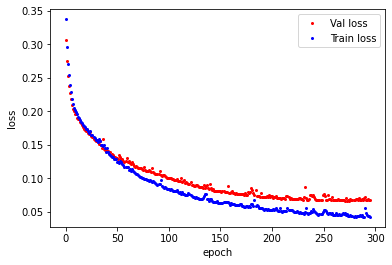

In [8]:
hist_df = pd.DataFrame(history.history)

#val_loss, val_acc 변화 보고싶어요

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

#x값을 지정, 테스트셋(검증용 셋)의 오차 > 빨간색, 학습셋 오차 > 파란색

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Val loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Train loss')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [9]:
#테스트 결과 출력
model.evaluate(x_test, y_test)
print('testset_acc: ', round(score[1],2))

41/41 [==============================] - 0s 10ms/step - loss: 0.0711 - accuracy: 0.9815
testset_acc:  0.98
